# **Face regconition**
This project use to regconize the character in the serie Breaking Bad


Firstly, we load the library and the data

In [1]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=2fea07fe828382a0a46727911d01264d75b5e1595c0623501245dddcd0f484e1
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [2]:
!pip install intel-tensorflow
import os

     |████████████████████████████████| 386.6MB 41kB/s 


In [3]:
wget.download('https://github.com/dautroc1/Face-regconition/raw/main/data/weights.zip')
wget.download('https://github.com/dautroc1/Face-regconition/raw/main/data/fr_utils.py')
wget.download('https://github.com/dautroc1/Face-regconition/raw/main/data/inception_blocks_v2.py')
wget.download('https://github.com/dautroc1/Face-regconition/raw/main/data/image.zip')
wget.download('https://github.com/dautroc1/Face-regconition/raw/main/data/test.zip')


'test.zip'

In [15]:
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
K.set_image_data_format('channels_first')
import cv2
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from fr_utils import *
from inception_blocks_v2 import *
from IPython.display import Image as Iimage
%matplotlib inline
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
!unzip weights.zip
!unzip image.zip
!unzip test.zip

Archive:  weights.zip
   creating: weights/
  inflating: weights/bn1_b.csv       
  inflating: weights/bn1_m.csv       
  inflating: weights/bn1_v.csv       
  inflating: weights/bn1_w.csv       
  inflating: weights/bn2_b.csv       
  inflating: weights/bn2_m.csv       
  inflating: weights/bn2_v.csv       
  inflating: weights/bn2_w.csv       
  inflating: weights/bn3_b.csv       
  inflating: weights/bn3_m.csv       
  inflating: weights/bn3_v.csv       
  inflating: weights/bn3_w.csv       
  inflating: weights/conv1_b.csv     
  inflating: weights/conv1_w.csv     
  inflating: weights/conv2_b.csv     
  inflating: weights/conv2_w.csv     
  inflating: weights/conv3_b.csv     
  inflating: weights/conv3_w.csv     
  inflating: weights/dense_b.csv     
  inflating: weights/dense_w.csv     
  inflating: weights/inception_3a_1x1_bn_b.csv  
  inflating: weights/inception_3a_1x1_bn_m.csv  
  inflating: weights/inception_3a_1x1_bn_v.csv  
  inflating: weights/inception_3a_1x1_bn_w.csv  


In [6]:
tf.python._pywrap_util_port.IsMklEnabled()

True

We have already trained the model. Now, we are loading the weights into the model.

In [7]:
FRmodel = faceRecoModel(input_shape=(3,96, 96))
print("Total Params:", FRmodel.count_params())

Total Params: 3743280


In [8]:
def triplet_loss(y_true, y_pred, alpha = 0.2):
    
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)), axis=-1)
   
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)), axis= -1)
    
    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0.0))
    
    
    return loss

In [9]:
FRmodel.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])
load_weights_from_FaceNet(FRmodel)

This function use to transform images to correct form.

In [10]:
def encoding_all(database):
  wal = str('Walter White')
  files_and_directories = os.listdir("image/Walter white/")
  for element in files_and_directories:
    database[wal].append(img_to_encoding("image/Walter white/" + element, FRmodel))
  files_and_directories = os.listdir("image/Gus/")
  for element in files_and_directories:
    database["Gustavo Fring"].append(img_to_encoding("image/Gus/" + element, FRmodel))
  files_and_directories = os.listdir("image/Hank/")
  for element in files_and_directories:
    database["Hank Schrader"].append(img_to_encoding("image/Hank/" + element, FRmodel))
  files_and_directories = os.listdir("image/Jesse/")
  for element in files_and_directories:
    database["Jesse Pinkman"].append(img_to_encoding("image/Jesse/" + element, FRmodel))
  files_and_directories = os.listdir("image/Lydia/")
  for element in files_and_directories:
    database["Lydia Rodarte-Quayle"].append(img_to_encoding("image/Lydia/" + element, FRmodel))
  files_and_directories = os.listdir("image/Marie/")
  for element in files_and_directories:
    database["Marie Schrader"].append(img_to_encoding("image/Marie/" + element, FRmodel))
  files_and_directories = os.listdir("image/Mike/")
  for element in files_and_directories:
    database["Mike Ehrmantraut"].append(img_to_encoding("image/Mike/" + element, FRmodel))
  files_and_directories = os.listdir("image/Saul/")
  for element in files_and_directories:
    database["Saul Goodman"].append(img_to_encoding("image/Saul/" + element, FRmodel))
  files_and_directories = os.listdir("image/Skyler/")
  for element in files_and_directories:
    database["Skyler White"].append(img_to_encoding("image/Skyler/" + element, FRmodel))
  files_and_directories = os.listdir("image/Todd/")
  for element in files_and_directories:
    database["Todd Alquist"].append(img_to_encoding("image/Todd/" + element, FRmodel))
  files_and_directories = os.listdir("image/Walter jr/")
  for element in files_and_directories:
    database["Walter White Jr."].append(img_to_encoding("image/Walter jr/" + element, FRmodel))
  

Now we are loading to database.

In [11]:

from collections import defaultdict
database = defaultdict(list)
encoding_all(database)

This function uses to return who is this character.

In [16]:
def who_is_it(image_path, database, model):
    
    encoding = img_to_encoding(image_path, model)
    
    min_dist = 100
    
    for (name, db_enc) in database.items():
        for element in db_enc:
          
          dist = np.linalg.norm(encoding-element)
          if dist < min_dist:
              min_dist = dist
              identity = name


    
    if min_dist > 0.7:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
    im = Image.open(image_path)
    display(im)
    return min_dist, identity

it's Jesse Pinkman, the distance is 0.5596274


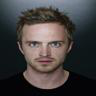

(0.5596274, 'Jesse Pinkman')

In [17]:
who_is_it("test/jesse.jpg", database, FRmodel)

it's Saul Goodman, the distance is 0.46391082


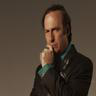

(0.46391082, 'Saul Goodman')

In [18]:
who_is_it("test/saul.jpg", database, FRmodel)

it's Walter White, the distance is 0.45987678


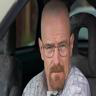

(0.45987678, 'Walter White')

In [19]:
who_is_it("test/wal.jpg", database, FRmodel)

Feel free to try it yourself. Remember to use the code below to transform your input to the correct form. Have fun!!

In [ ]:
'''
img = Image.open('yourimage.jpg')
new_img = img.resize((96,96))
new_img.save("yourimage.jpg", "JPEG", optimize=True)

'''